# Exemple sur le tri en Python

## Allure de la courbe

In [1]:
from random import randrange
from timeit import repeat, timeit
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf
from IPython.display import display

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

def make_array(length=100, max_range=1000):
    """returns an array of integers in [0, `max_range`[ of length `length`"""
    return [randrange(max_range) for _ in range(length)]


NB_EXECS = 1
MAX_EXPONENT = 6
MIN_EXPONENT = 1
NB_REPEAT = 5
BASE = 10

In [2]:

results = {}

for length in range(BASE ** (MAX_EXPONENT - 1), BASE ** (MAX_EXPONENT) + 1, BASE ** (MAX_EXPONENT - 1)):
    print(f"Repeat {NB_REPEAT} times {NB_EXECS} executions on length {length}")
    test_array = make_array(length, 2 * length)
    results[length] = [
        t / NB_EXECS for t in repeat(lambda: sorted(test_array), repeat=NB_REPEAT, number=NB_EXECS)
    ]


Repeat 5 times 1 executions on length 100000
Repeat 5 times 1 executions on length 200000
Repeat 5 times 1 executions on length 300000
Repeat 5 times 1 executions on length 400000
Repeat 5 times 1 executions on length 500000
Repeat 5 times 1 executions on length 600000
Repeat 5 times 1 executions on length 700000
Repeat 5 times 1 executions on length 800000
Repeat 5 times 1 executions on length 900000
Repeat 5 times 1 executions on length 1000000


In [3]:
data = (
    pd.DataFrame.from_dict(results, orient="index")
    .rename_axis(index="size")
    .melt(var_name="repeat", value_name="time", ignore_index=False)
    .reset_index()
    .sort_values(["size", "repeat"])
)
display(data)


,size,repeat,time
0,100000,0,0.066064
10,100000,1,0.056124
20,100000,2,0.048243
30,100000,3,0.050645
40,100000,4,0.052987
1,200000,0,0.079921
11,200000,1,0.069032
21,200000,2,0.065763
31,200000,3,0.062441
41,200000,4,0.070602


<AxesSubplot:xlabel='size', ylabel='time'>

<Figure size 432x288 with 1 Axes>

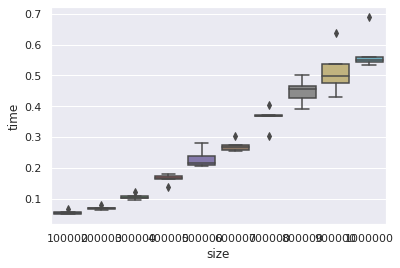

In [4]:
sns.boxplot(data=data, x = "size", y = "time")
# sns.scatterplot(data=data, x = "size", y = "time")

Une regression

In [5]:
interp_n = smf.ols("time ~ I(size)", data=data).fit()
interp_n.summary()

OLS Regression Results 
 
 Dep. Variable: time R-squared: 0.943 
 
 
 Model: OLS Adj. R-squared: 0.942 
 
 
 Method: Least Squares F-statistic: 790.6 
 
 
 Date: Mon, 18 Jul 2022 Prob (F-statistic): 1.80e-31 
 
 
 Time: 18:30:07 Log-Likelihood: 85.661 
 
 
 No. Observations: 50 AIC: -167.3 
 
 
 Df Residuals: 48 BIC: -163.5 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 Intercept -0.0593 0.014 -4.361 0.000 -0.087 -0.032 
 
 
 I(size) 6.164e-07 2.19e-08 28.118 0.000 5.72e-07 6.6e-07 
 
 
 
 
 Omnibus: 16.708 Durbin-Watson: 1.726 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 20.689 
 
 
 Skew: 1.223 Prob(JB): 3.22e-05 
 
 
 Kurtosis: 4.987 Cond. No. 1.34e+06 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified. [2] The condition number is large, 1.34e+06. This might indicate that there are strong multicollinearity or other numerical problems.

In [6]:
interp_nlogn = smf.ols("time ~ I(size* np.log(size))", data=data).fit()
print(interp_nlogn.params)
interp_nlogn.summary()

Intercept                -4.207699e-02
I(size * np.log(size))    4.376167e-08
dtype: float64


OLS Regression Results 
 
 Dep. Variable: time R-squared: 0.947 
 
 
 Model: OLS Adj. R-squared: 0.946 
 
 
 Method: Least Squares F-statistic: 863.0 
 
 
 Date: Mon, 18 Jul 2022 Prob (F-statistic): 2.46e-32 
 
 
 Time: 18:30:10 Log-Likelihood: 87.732 
 
 
 No. Observations: 50 AIC: -171.5 
 
 
 Df Residuals: 48 BIC: -167.6 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 Intercept -0.0421 0.013 -3.364 0.002 -0.067 -0.017 
 
 
 I(size * np.log(size)) 4.376e-08 1.49e-09 29.377 0.000 4.08e-08 4.68e-08 
 
 
 
 
 Omnibus: 17.762 Durbin-Watson: 1.883 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 23.290 
 
 
 Skew: 1.250 Prob(JB): 8.76e-06 
 
 
 Kurtosis: 5.219 Cond. No. 1.74e+07 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified. [2] The condition number is large, 1.74e+07. This might indicate that there are strong multicollinearity or other numerical problems.

<Figure size 432x288 with 1 Axes>

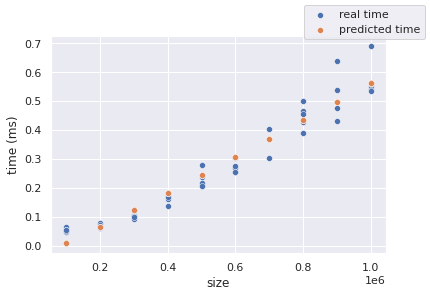

In [7]:
data["pred"] = interp_nlogn.predict()
fig = plt.figure()
ax1 = sns.scatterplot(x="size", y="time", data=data)
ax2 = sns.scatterplot(x="size", y="pred", data=data)

ax2.set_ylabel("time (ms)")
fig.legend(labels=["real time", "predicted time"])
plt.show()
